# Wednesday, November 12th, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conway's Game of Life

Conway's [Game of Life](https://conwaylife.com/wiki/Conway%27s_Game_of_Life) is a cellular automaton created by John Conway in 1970. It is a deterministic process where the next state of a population of cells depends only on the current state. We will use 2D NumPy arrays to represent the population of cells aranged in an $n \times n$ grid.
A value of `1` will signify that a cell is alive while a value of `0` will signify that a cell is dead.

### Starting configuration

Lets begin with an $ n\times n $ array of all 0s with a small three-block column (3$\times$1) of 1s in the middle. Use an integer datatype (`dtype=int`) when defining your array.

**Exercise:**  Write a function `starting_state(n)` that returns the array described above.

In [2]:
def starting_state(n):
    cells = np.zeros((n,n), dtype=int)
    
    cells[n//2-1: n//2+2 , n//2] = 1

    return cells

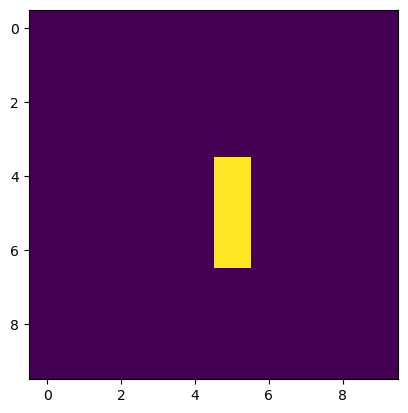

In [3]:
cells = starting_state(10)

plt.imshow(cells)





### Rules of Life

We will use the current state of the population to determine the next state.
In the Game of Life, each cell interacts with its eight neighbors (i.e. the horizontally, vertically, or diagonally adjacent cells).

![neighbors](https://jllottes.github.io/_images/epidemic-2.svg)

The rules of the Game of Life can be summarized as follows:

 1. Any live cell with two or three live neighbors survives.
 2. Any dead cell with with three live neighbors becomes a live cell.
 3. All other live cells die in the next generation, and all other dead cells stay dead.

### Counting the number of live neighbors

In order to update our array from one state to the next, we need to be able to count the number of live neighbors of the $(i,j)$th cell for any choice of $i,j$.

**Exercise:** Write a function `count_live_neighbors(cells,i,j)` that counts the number of living neighbors of the $(i,j)$th cell.

 - We handled a similar problem with the [Image Denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising) project.
 - How can we handle cells on the edge of the grid?
 - The `np.sum` function will add all values in an array.
 - We want to exclude (or remove from the sum) the $(i,j)$th cell when counting the number of living neighbors.



In [7]:
def get_padded_cells(cells, pad=1):
    num_rows, num_cols = cells.shape
    padded_cells = np.zeros((num_rows + 2*pad, num_cols + 2*pad), dtype=int)
    padded_cells[pad:-pad, pad:-pad] = cells
    return padded_cells

In [8]:
def count_live_neighbors(cells, i, j):
    padded_cells = get_padded_cells(cells)
    neighbors = padded_cells[i:i+3, j:j+3]
    live_neighbors = np.sum(neighbors) - neighbors[1,1]
    return live_neighbors




In [12]:
print(count_live_neighbors(cells, 4,5))
print(count_live_neighbors(cells, 5,5))
print(count_live_neighbors(cells, 6,5))

print(count_live_neighbors(cells, 5,4))



1
2
1
3


### Updating the `cells` population

We can now update the `cells` array according to the rules.  We have to update every entry of the array, so we will need to loop through all the entries.

**Exercise:** Write a function `update_cells(cells)` that takes in a population array `cells`, applies the Rules of Life to update the population, and returns the updated population.

In [13]:
def update_cells(cells):
    num_rows, num_cols = cells.shape
    updated_cells = cells.copy()
    for row in range(num_rows):
        for col in range(num_cols):
            live_neighbors = count_live_neighbors(cells, row, col)
            # If a live cell has exactly two or three living neighbors, it stays alive
            if cells[row, col] == 1 and (live_neighbors == 2 or live_neighbors == 3):
                updated_cells[row, col] = 1
            # If a dead cell has exactly three living neighbors, it becomes alive
            elif cells[row, col] == 0 and live_neighbors == 3:
                updated_cells[row, col] = 1
            # All other cells are dead
            else:
                updated_cells[row, col] = 0

    return updated_cells

Text(0.5, 1.0, 'Updated cells')

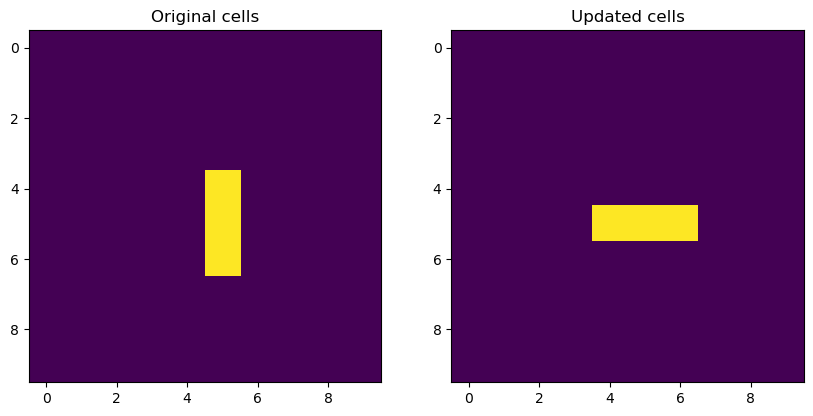

In [14]:
updated_cells = update_cells(cells)

fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cells)
plt.title('Original cells')

plt.subplot(1,2,2)
plt.imshow(updated_cells)
plt.title('Updated cells')

### Animating the dynamics

The `FuncAnimation` function from `matplotlib.animation` can be used to create animations.
It takes in a figure `fig` and function `animate`. The `animate` function should take in a frame index `i` and perform any desired updates to the figure.

In [ ]:
%matplotlib qt
#%matplotlib widget
from matplotlib.animation import FuncAnimation

Note: Try the following to get interactive plots inline as part of the notebook itself:

 * Launch a terminal (if using Mac or Linux) or Anaconda Prompt (if using Windows).
 * Enter the following commands:
   - `pip install ipympl`
   - `jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-matplotlib`
 * Restart your Jupyter notebook kernel, then comment the line `%matplotlib qt` and uncomment the line `%matplotlib widget`.

**Exercise:** Modify the code below to animate the Game of Life.

In [ ]:
x = np.zeros((200,200), dtype = int)

fig = plt.figure()
im = plt.imshow(x,vmin=0,vmax=1)               # Generate the initial plot

def animate(i):
    x[:,:]= (np.random.random(x.shape) > .5)   # Update the x array with random data
    im.set_data(x)                             # Update the figure with new x array
    return im

anim = FuncAnimation(fig, animate, cache_frame_data=False)
plt.show()

**Exercise:** Use `np.random.rand` to randomly select an initial `cells` array of `0`s and `1`s.

What can we do to make our code run more efficiently? At a `200` by `200` grid, it is very slow to update. Let's look at the `count_live_neighbors` function, which will run $n^2$ times for an $n$ by $n$ grid. Let's rewrite `count_live_neighbors` to take `padded_cells` in as an input.

We'll then need to update the `update_cells` function to pass in `padded_cells`.

Let's see how this helps the speed of our animation.